# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as sts
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [53]:
cities

['rikitea',
 'tuktoyaktuk',
 'illoqqortoormiut',
 'kruisfontein',
 'albany',
 'vaitupu',
 'ponta do sol',
 'khatanga',
 'avarua',
 'pulandian',
 'kapaa',
 'dikson',
 'ushuaia',
 'golden',
 'kathmandu',
 'georgetown',
 'belize',
 'le port',
 'canutama',
 'mataura',
 'atuona',
 'yar-sale',
 'busselton',
 'svetlogorsk',
 'butaritari',
 'yellowknife',
 'faanui',
 'nanning',
 'laguna',
 'attawapiskat',
 'jamestown',
 'ponta delgada',
 'xichang',
 'nikolskoye',
 'bredasdorp',
 'saskylakh',
 'witbank',
 'saint-philippe',
 'saint-augustin',
 'airai',
 'hobart',
 'dalnerechensk',
 'souillac',
 'kavieng',
 'new norfolk',
 'barentsburg',
 'port-gentil',
 'cape town',
 'codrington',
 'cherskiy',
 'puerto madero',
 'jalu',
 'port elizabeth',
 'fountain',
 'sao filipe',
 'lucapa',
 'naifaru',
 'carauari',
 'barrow',
 'mercedes',
 'norman wells',
 'shieli',
 'plouzane',
 'san jose',
 'taolanaro',
 'biltine',
 'qaanaaq',
 'punta arenas',
 'mawlaik',
 'phan rang',
 'opuwo',
 'elk point',
 'tacoronte',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Set up of lists 
lat = []
lng = []
max_temp= []
humidity = []
cloudiness = []
windspeed = []
country = []
date =[]
cities_final=[]

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "puerto madero"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city
query_url
    

# Get weather data responses 
weather_response = requests.get(query_url)
weather_json = weather_response.json()
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
current_city = city

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city
query_url
  

# Get weather data responses 
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json
        

{'coord': {'lon': -92.42, 'lat': 14.72},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 305.15,
  'feels_like': 310.27,
  'temp_min': 305.15,
  'temp_max': 305.15,
  'pressure': 1013,
  'humidity': 70},
 'visibility': 16093,
 'wind': {'speed': 2.6, 'deg': 280},
 'clouds': {'all': 40},
 'dt': 1591637837,
 'sys': {'type': 1,
  'id': 7171,
  'country': 'MX',
  'sunrise': 1591616383,
  'sunset': 1591663094},
 'timezone': -18000,
 'id': 3520989,
 'name': 'Puerto Madero',
 'cod': 200}

In [8]:
print("Beggining of Data Retrieval")
print("----------------------------------------")
count = 0
set_count= 0

for city in cities:
    
    if count%25== 0 :
        set_count= set_count + 1
        count= 0
    
    count = count + 1
    # Save config information
    url = "http://api.openweathermap.org/data/2.5/weather?"
    current_city = city

    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    query_url
    
    # Get weather data responses 
    
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        cities_final.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        
        print(f'Processing Record {count} of {set_count}| {current_city}')
    except:
        print(f'City not found. Skipping... {current_city}')
      
print("----------------------------------------")    
print("Data Retrieval Complete")
print("----------------------------------------")

Beggining of Data Retrieval
----------------------------------------
Processing Record 1 of 1| hithadhoo
Processing Record 2 of 1| qinggang
City not found. Skipping... ayer itam
Processing Record 4 of 1| mataura
Processing Record 5 of 1| amurzet
Processing Record 6 of 1| tupik
Processing Record 7 of 1| albany
Processing Record 8 of 1| vaini
Processing Record 9 of 1| hualmay
Processing Record 10 of 1| namatanai
Processing Record 11 of 1| tasiilaq
Processing Record 12 of 1| ushuaia
Processing Record 13 of 1| georgetown
Processing Record 14 of 1| khatanga
Processing Record 15 of 1| punta arenas
Processing Record 16 of 1| malpura
Processing Record 17 of 1| busselton
Processing Record 18 of 1| bengkulu
Processing Record 19 of 1| magalia
City not found. Skipping... taolanaro
Processing Record 21 of 1| lavrentiya
Processing Record 22 of 1| cape town
Processing Record 23 of 1| muros
Processing Record 24 of 1| yulara
Processing Record 25 of 1| saldanha
City not found. Skipping... marcona
Proces

Processing Record 1 of 10| beatrice
City not found. Skipping... tsihombe
Processing Record 3 of 10| aykhal
Processing Record 4 of 10| lugo
Processing Record 5 of 10| sheksna
Processing Record 6 of 10| santa cruz
Processing Record 7 of 10| nanortalik
Processing Record 8 of 10| kavaratti
Processing Record 9 of 10| paita
Processing Record 10 of 10| belaya gora
Processing Record 11 of 10| pshekhskaya
Processing Record 12 of 10| buin
Processing Record 13 of 10| cedeno
Processing Record 14 of 10| coquimbo
Processing Record 15 of 10| arlit
Processing Record 16 of 10| ballina
Processing Record 17 of 10| stranda
Processing Record 18 of 10| atasu
Processing Record 19 of 10| vardo
Processing Record 20 of 10| kungurtug
Processing Record 21 of 10| roald
Processing Record 22 of 10| southampton
Processing Record 23 of 10| ostrovnoy
Processing Record 24 of 10| yuty
Processing Record 25 of 10| isangel
Processing Record 1 of 11| kaeo
City not found. Skipping... meyungs
Processing Record 3 of 11| starosh

Processing Record 21 of 18| kilindoni
Processing Record 22 of 18| astana
Processing Record 23 of 18| lubango
Processing Record 24 of 18| warrington
Processing Record 25 of 18| bairiki
Processing Record 1 of 19| port hedland
Processing Record 2 of 19| bilma
Processing Record 3 of 19| sorong
Processing Record 4 of 19| ciro marina
Processing Record 5 of 19| claresholm
Processing Record 6 of 19| carballo
Processing Record 7 of 19| ukiah
Processing Record 8 of 19| tuy hoa
Processing Record 9 of 19| myitkyina
Processing Record 10 of 19| goderich
Processing Record 11 of 19| norman wells
Processing Record 12 of 19| rafraf
Processing Record 13 of 19| zaltan
Processing Record 14 of 19| shimoda
Processing Record 15 of 19| chicama
Processing Record 16 of 19| vila franca do campo
City not found. Skipping... kadykchan
Processing Record 18 of 19| laguna
Processing Record 19 of 19| axim
Processing Record 20 of 19| ust-nera
Processing Record 21 of 19| kalmunai
Processing Record 22 of 19| gayeri
Process

Today's date: 2020-06-07


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pimentel
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | pangai
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | watsa
Processing Record 14 of Set 1 | rosetta
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | u

Processing Record 38 of Set 4 | tres picos
Processing Record 39 of Set 4 | saint-francois
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | mackay
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | banda aceh
Processing Record 44 of Set 4 | bang saphan
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | san juan
Processing Record 47 of Set 4 | waingapu
Processing Record 48 of Set 4 | santa isabel
Processing Record 49 of Set 4 | turukhansk
Processing Record 0 of Set 5 | saurimo
Processing Record 1 of Set 5 | ambon
Processing Record 2 of Set 5 | ambulu
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | beringovskiy
Processing Record 7 of Set 5 | sobolevo
Processing Record 8 of Set 5 | tateyama
Processing Record 9 of Set 5 | shambu
Processing Record 10 of Set 5 | dingle
Processing Record 11 of Set 5 | nizhneyansk
City not found. Ski

Processing Record 28 of Set 8 | mongomo
Processing Record 29 of Set 8 | hunza
City not found. Skipping...
Processing Record 30 of Set 8 | bow island
Processing Record 31 of Set 8 | moerai
Processing Record 32 of Set 8 | xichang
Processing Record 33 of Set 8 | sakhnovshchyna
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | santa rosa
Processing Record 36 of Set 8 | severo-yeniseyskiy
Processing Record 37 of Set 8 | madera
Processing Record 38 of Set 8 | rizhao
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | bani
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | miles city
Processing Record 43 of Set 8 | ulaanbaatar
Processing Record 44 of Set 8 | lagoa
Processing Record 45 of Set 8 | syasstroy
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | east london
Processing Record 48 of Set 8 | karakol
Processing Record 49 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 0 of Set 9 | andr

Processing Record 14 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 12 | adeje
Processing Record 16 of Set 12 | simpang
Processing Record 17 of Set 12 | athabasca
Processing Record 18 of Set 12 | prince rupert
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | sayyan
Processing Record 21 of Set 12 | figline valdarno
Processing Record 22 of Set 12 | srednekolymsk
Processing Record 23 of Set 12 | kapit
Processing Record 24 of Set 12 | erenhot
Processing Record 25 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 26 of Set 12 | toftir
City not found. Skipping...
Processing Record 27 of Set 12 | agdam
Processing Record 28 of Set 12 | indianola
Processing Record 29 of Set 12 | honiton
Processing Record 30 of Set 12 | batemans bay
Processing Record 31 of Set 12 | namtsy
Processing Record 32 of Set 12 | bonoua
Processing Record 33 of Set 12 | aracati
Processing Record 34 of Set 12 | mareeba
Processing Record 35 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [9]:
# Final DataFrame
City_pd = pd.DataFrame({"City":cities_final, "Lat":lat, "Lng":lng, "Max Temp":max_temp,
                       "Humidity":humidity, "Cloudiness":cloudiness, "WindSpeed":windspeed, "Country":country, "Date":date})
City_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,Hithadhoo,-0.60,73.08,302.37,66,84,3.57,MV,1591637841
1,Qinggang,46.68,126.08,293.42,85,100,4.87,CN,1591637842
2,Mataura,-46.19,168.86,281.72,82,97,4.20,NZ,1591637842
3,Amurzet,47.70,131.10,290.03,97,100,3.64,RU,1591637842
4,Tupik,54.43,119.93,281.49,71,15,1.63,RU,1591637842
...,...,...,...,...,...,...,...,...,...
548,Pangai,-19.80,-174.35,298.15,88,75,7.20,TO,1591637952
549,Anori,-3.77,-61.64,303.14,74,19,1.38,BR,1591637952
550,Ivanteyevka,55.97,37.92,298.15,57,42,4.00,RU,1591637952
551,Lakshmīpur,22.95,90.83,302.07,79,9,3.03,BD,1591637952


In [10]:
City_pd["City"]

0        Hithadhoo
1         Qinggang
2          Mataura
3          Amurzet
4            Tupik
          ...     
548         Pangai
549          Anori
550    Ivanteyevka
551     Lakshmīpur
552        Kodīnar
Name: City, Length: 553, dtype: object

In [11]:
City_pd["Max Temp"]= [((t*(9/5))-459.67) for t in City_pd['Max Temp'] ]
City_pd



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,Hithadhoo,-0.60,73.08,84.596,66,84,3.57,MV,1591637841
1,Qinggang,46.68,126.08,68.486,85,100,4.87,CN,1591637842
2,Mataura,-46.19,168.86,47.426,82,97,4.20,NZ,1591637842
3,Amurzet,47.70,131.10,62.384,97,100,3.64,RU,1591637842
4,Tupik,54.43,119.93,47.012,71,15,1.63,RU,1591637842
...,...,...,...,...,...,...,...,...,...
548,Pangai,-19.80,-174.35,77.000,88,75,7.20,TO,1591637952
549,Anori,-3.77,-61.64,85.982,74,19,1.38,BR,1591637952
550,Ivanteyevka,55.97,37.92,77.000,57,42,4.00,RU,1591637952
551,Lakshmīpur,22.95,90.83,84.056,79,9,3.03,BD,1591637952


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
humiditydf = City_pd[City_pd["Humidity"] > 100]
humiditydf

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,WindSpeed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.
# No cities over 100% Humidity

Int64Index([], dtype='int64')

In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Skipping step

# Original DataFrame works

# Export the City_Data into a csv
City_pd.to_csv('City_Data.csv')

## Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
today = date.today()
print(f"Today's date: {today}")
# Save the plotted figures as .pngs.
## Latitude vs. Temperature Plot

Today's date: 2020-06-08


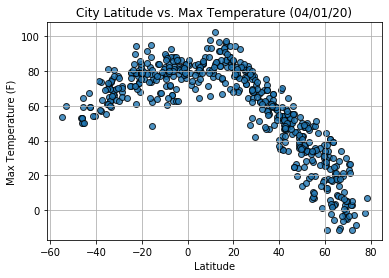

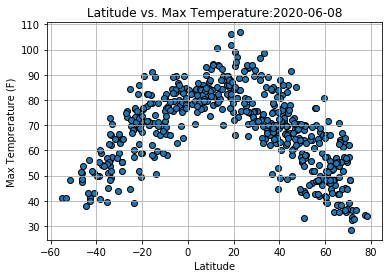

In [25]:
plt.scatter(City_pd['Lat'],City_pd['Max Temp'],marker='o',edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temprerature (F)')
plt.title(f"Latitude vs. Max Temperature:{today}")
plt.savefig('Latitude vs. MaxTemp Scatter Plot.png')
plt.grid()
plt.show()

In [ ]:
print("Max temperature increased as latitude approaches zero and decreases as it approaches the northern and soutern pole")

## Latitude vs. Humidity Plot

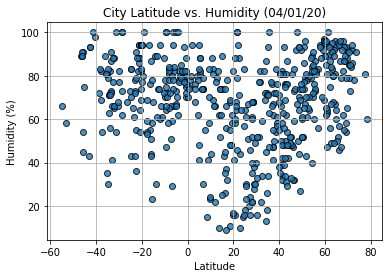

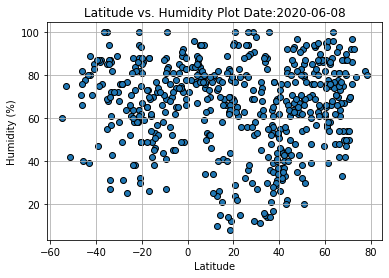

<Figure size 432x288 with 0 Axes>

In [26]:

plt.scatter(City_pd['Lat'],City_pd['Humidity'],marker='o',edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Latitude vs. Humidity Plot Date:{today}")
plt.grid()
plt.show()
plt.tight_layout()
plt.savefig('Latitude vs. Humidity Scatter Plot.png')

In [ ]:
print("Humidity is scattered accross all latitudes")

## Latitude vs. Cloudiness Plot

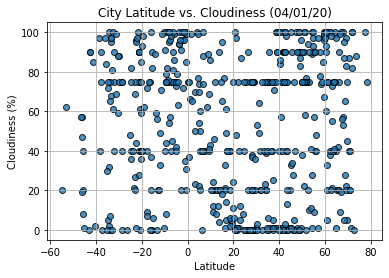

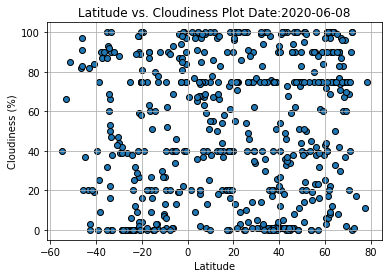

In [27]:
plt.scatter(City_pd['Lat'],City_pd['Cloudiness'],marker='o',edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Latitude vs. Cloudiness Plot Date:{today}")
plt.savefig('Latitude vs. Cloudiness Scatter Plot.png')
plt.grid()
plt.show()

In [30]:
print("Cloudiness is scattered accross all latitudes")

Cloudiness is scattered accross all latitudes


## Latitude vs. Wind Speed Plot

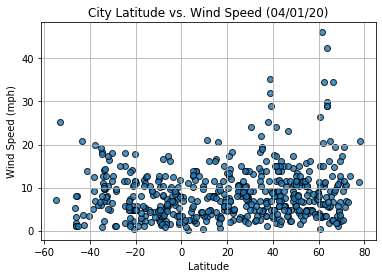

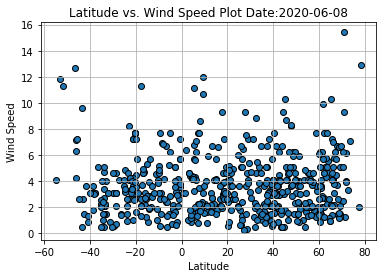

In [28]:
plt.scatter(City_pd['Lat'],City_pd['WindSpeed'],marker='o',edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"Latitude vs. Wind Speed Plot Date:{today}")
plt.savefig('Latitude vs. Wind Speed Scatter Plot.png')
plt.grid()
plt.show()

In [29]:
print("Windspeed normally does not surpass 30 mph across all latitudes")

Windspeed normally does not surpass 30 mph across all latitudes


## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots . Function defined in first graph


In [31]:
# Create Northern and Southern Hemisphere DataFrames
northerndf=City_pd[City_pd["Lat"] > 0]
northerndf



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,WindSpeed,Country,Date
1,Qinggang,46.68,126.08,68.486,85,100,4.87,CN,1591637842
3,Amurzet,47.70,131.10,62.384,97,100,3.64,RU,1591637842
4,Tupik,54.43,119.93,47.012,71,15,1.63,RU,1591637842
5,Albany,42.60,-73.97,77.000,33,49,4.43,US,1591637843
9,Tasiilaq,65.61,-37.64,42.800,70,75,7.20,GL,1591637843
...,...,...,...,...,...,...,...,...,...
545,Yuli,9.70,10.27,87.908,52,55,3.65,NG,1591637951
546,Tortolì,39.93,9.66,72.428,62,22,0.71,IT,1591637951
550,Ivanteyevka,55.97,37.92,77.000,57,42,4.00,RU,1591637952
551,Lakshmīpur,22.95,90.83,84.056,79,9,3.03,BD,1591637952


In [32]:
southerndf=City_pd[City_pd["Lat"] < 0]
southerndf

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,Hithadhoo,-0.60,73.08,84.596,66,84,3.57,MV,1591637841
2,Mataura,-46.19,168.86,47.426,82,97,4.20,NZ,1591637842
6,Vaini,-21.20,-175.20,73.400,88,90,3.60,TO,1591637843
7,Hualmay,-11.10,-77.61,69.674,66,30,4.56,PE,1591637843
8,Namatanai,-3.67,152.43,80.096,81,87,2.19,PG,1591637843
...,...,...,...,...,...,...,...,...,...
542,Talcahuano,-36.72,-73.12,53.600,100,90,5.10,CL,1591637951
543,Poum,-20.23,164.02,73.634,75,100,3.93,NC,1591637951
547,Tautira,-17.73,-149.15,71.600,73,20,2.10,PF,1591637951
548,Pangai,-19.80,-174.35,77.000,88,75,7.20,TO,1591637952


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


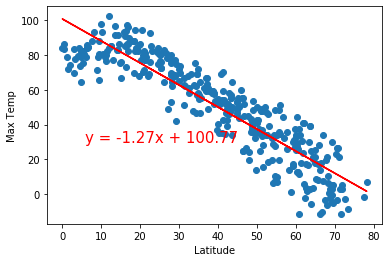

The r-squared is: -0.79


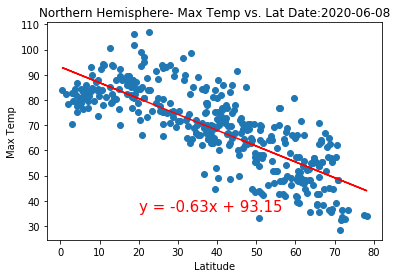

In [33]:
currentdf=northerndf
current_x=currentdf['Lat']
current_y=currentdf['Max Temp']
xlabel= "Latitude"
ylabel= "Max Temp"
title=(f"Northern Hemisphere- Max Temp vs. Lat Date:{today}")
namefile="Northern Hemisphere- Max Temp"
#Need to adjust location of the equation? Adjust Below
locationx=20
locationy=36

def repeatlinear():
    corr=round(sts.pearsonr(current_x,current_y)[0],2)
    print(f"The r-squared is: {corr}")
    x_values = current_x
    y_values = current_y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(current_x,current_y)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(line_eq,(locationx,locationy),fontsize=15,color="red")
    plt.show
    plt.savefig(namefile+'.png')
    
repeatlinear()



The r-squared is: -0.81


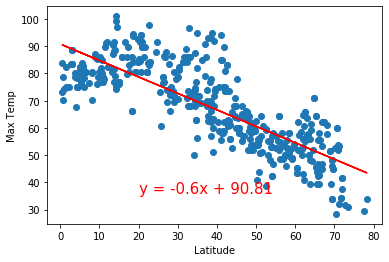

In [199]:
print("In the Northern hemisphere there is a negative correlation between the latitude coordinates and Max Temp. The closer to the equator, more max temps are present. As latiture coordinates increase, max temperature decreases")

In the Northern hemisphere there is a negative correlation between the latitude coordinates and Max Temp. The closer to the equator, more max temps are present. As latiture coordinates increase, max temperature decreases


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


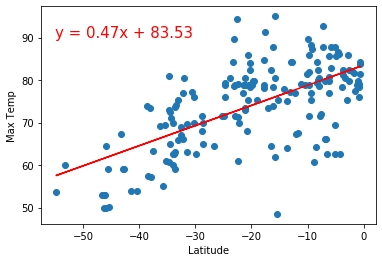

The r-squared is: 0.8


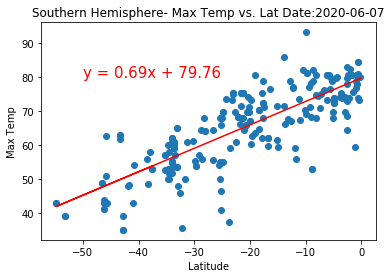

In [192]:
currentdf=southerndf
current_x=currentdf['Lat']
current_y=currentdf['Max Temp']
xlabel= "Latitude"
ylabel= "Max Temp"
title=(f"Southern Hemisphere- Max Temp vs. Lat Date:{today}")
#Need to adjust location of the equation? Adjust Below
locationx=-50
locationy=80
#input how you woild like to name your file
namefile="Southern Hemisphere- Max Temp"

repeatlinear()


In [ ]:
print("In the Southern hemisphere there is correlation between the latitude coordinates and Max Temp. The closer to the equator, more max temps are present")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


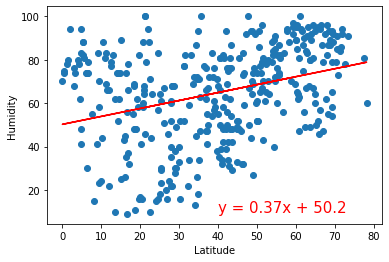

The r-squared is: 0.01


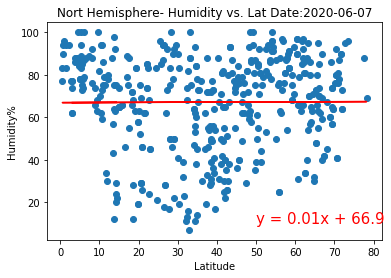

In [193]:
currentdf=northerndf
current_x=currentdf['Lat']
current_y=currentdf['Humidity']
xlabel= "Latitude"
ylabel= "Humidity%"
title=(f"Nort Hemisphere- Humidity vs. Lat Date:{today}")
#Need to adjust location of the equation? Adjust Below
locationx=50
locationy=10
#input how you woild like to name your file
namefile="North Hemisphere- Humidity vs. Lat "

repeatlinear()


In [ ]:
print("In the Nothern hemisphere there is little correlation between the latitude coordinates and the level of humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


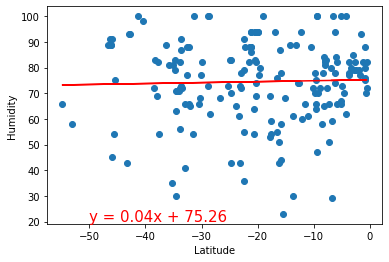

The r-squared is: 0.08


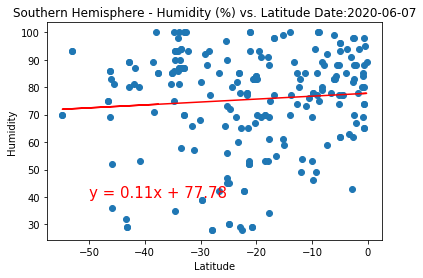

In [194]:
currentdf=southerndf
current_x=currentdf['Lat']
current_y=currentdf['Humidity']
xlabel= "Latitude"
ylabel= "Humidity"
title=(f"Southern Hemisphere - Humidity (%) vs. Latitude Date:{today}")
#Need to adjust location of the equation? Adjust Below
locationx=-50
locationy=40
#input how you woild like to name your file
namefile="South Hemisphere- Humidity vs. Lat "


repeatlinear()



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


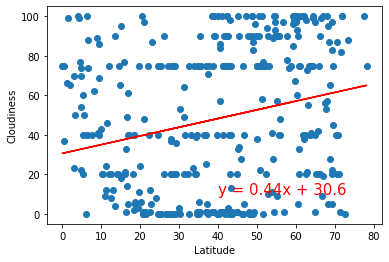

The r-squared is: 0.03


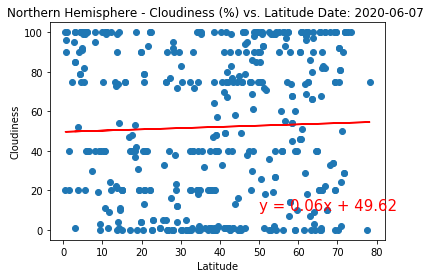

In [195]:
currentdf=northerndf
current_x=currentdf['Lat']
current_y=currentdf['Cloudiness']
xlabel= "Latitude"
ylabel= "Cloudiness"
title= (f"Northern Hemisphere - Cloudiness (%) vs. Latitude Date: {today} ")
#Need to adjust location of the equation? Adjust Below
locationx=50
locationy=10
#input how you would like to name your file
namefile="Northern Hemisphere - Cloudiness (%) vs. Latitude"

repeatlinear()


In [ ]:
print("In the Northern hemisphere there is little correlation between the latitude coordinates and the level of clodiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


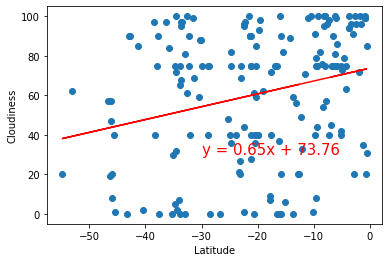

The r-squared is: 0.01


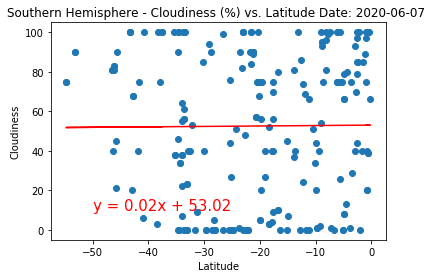

In [196]:
currentdf=southerndf
current_x=currentdf['Lat']
current_y=currentdf['Cloudiness']
xlabel= "Latitude"
ylabel= "Cloudiness"
title= (f"Southern Hemisphere - Cloudiness (%) vs. Latitude Date: {today} ")
#Need to adjust location of the equation? Adjust Below
locationx=-50
locationy=10
#input how you would like to name your file
namefile="Southern Hemisphere - Cloudiness (%) vs. Latitude"


repeatlinear()

In [197]:
print("In the Southern hemisphere there is little correlation between the latitude coordinates and the level of clodiness")

In the Southern hemisphere there is little correlation between the latitude coordinates and the level of clodiness


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


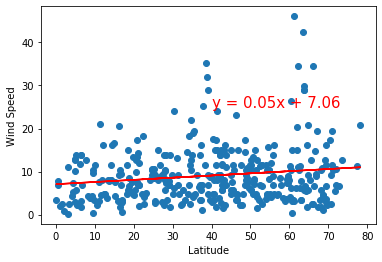

The r-squared is: 0.05


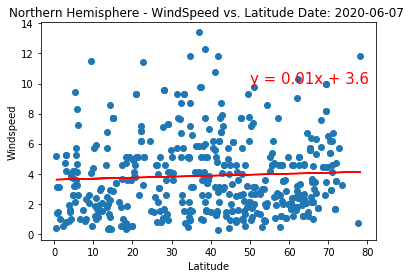

In [178]:
currentdf=northerndf
current_x=currentdf['Lat']
current_y=currentdf['WindSpeed']
xlabel= "Latitude"
ylabel= "Windspeed"
title= (f"Northern Hemisphere - WindSpeed vs. Latitude Date: {today} ")
#Need to adjust location of the equation? Adjust Below
locationx=50
locationy=10
#input how you would like to name your file
namefile="Northern Hemisphere - WindSpeed vs. Latitude"

repeatlinear()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


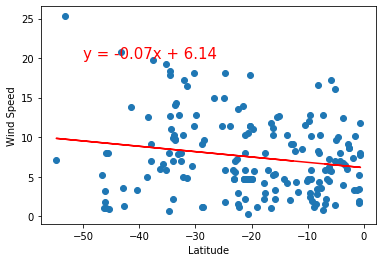

The r-squared is: -0.15


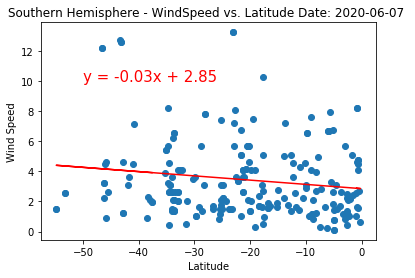

In [179]:
currentdf=southerndf
current_x=currentdf['Lat']
current_y=currentdf['WindSpeed']
xlabel= "Latitude"
ylabel= "Wind Speed"
title= (f"Southern Hemisphere - WindSpeed vs. Latitude Date: {today} ")
#Need to adjust location of the equation? Adjust Below
locationx=-50
locationy=10
#input how you would like to name your file
namefile="Southern Hemisphere - WindSpeed vs. Latitude"

repeatlinear()